In [37]:
import matplotlib.pyplot as plt
import pandas as pd
from tensorboard.backend.event_processing.event_accumulator import EventAccumulator
import numpy as np
import os
from torchsummary import summary

## Dataset count

In [38]:
ORIGINAL_DATA_DIR = "../original_data/train/"
AUG_DATA_DIR = "../aug_data_new/train/"

original_data_count = {}
aug_data_count = {}

for root, dirs, files in os.walk(ORIGINAL_DATA_DIR):
    if len(files):
        original_data_count[root.split("/")[-1]] = len(files)

for root, dirs, files in os.walk(AUG_DATA_DIR):
    if len(files):
        aug_data_count[root.split("/")[-1]] = len(files)

# sorting for plotting 
original_data_count = {key: value for key, value in sorted(original_data_count.items())}
aug_data_count = {key: value for key, value in sorted(aug_data_count.items())}

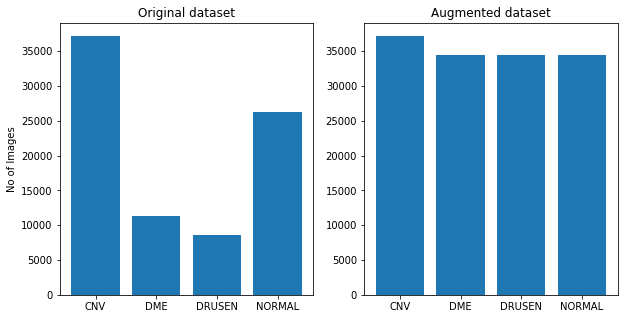

In [39]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.bar(original_data_count.keys(), original_data_count.values())
plt.ylabel("No of Images")
plt.title("Original dataset")

plt.subplot(1,2,2)
plt.bar(aug_data_count.keys(), aug_data_count.values())
plt.title("Augmented dataset")
plt.show()

In [40]:
# fig = plt.figure()
# ax = fig.add_axes([0,0,1,1])
# ax.bar(original_data_count.keys(), original_data_count.values())
# ax.set_ylabel("No of Images")
# ax.set_title("OCT2017 dataset (before data augmentation)")
# plt.show()

In [41]:
# fig = plt.figure()
# ax = fig.add_axes([0,0,1,1])
# ax.bar(aug_data_count.keys(), aug_data_count.values())
# ax.set_ylabel("No of Images")
# ax.set_title("OCT2017 dataset (after data augmentation)")
# plt.show()

## Event logs

### Real dataset

Exception ignored in: <_io.BufferedReader name='/home/anees.hashmi/.local/lib/python3.10/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf'>
Traceback (most recent call last):
  File "/home/anees.hashmi/.local/lib/python3.10/site-packages/matplotlib/backends/backend_agg.py", line 239, in get_text_width_height_descent
OSError: [Errno 116] Stale file handle
Exception ignored in: <_io.BufferedReader name='/home/anees.hashmi/.local/lib/python3.10/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf'>
Traceback (most recent call last):
  File "/home/anees.hashmi/.local/lib/python3.10/site-packages/matplotlib/backends/backend_agg.py", line 239, in get_text_width_height_descent
OSError: [Errno 116] Stale file handle
Exception ignored in: <_io.BufferedReader name='/home/anees.hashmi/.local/lib/python3.10/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf'>
Traceback (most recent call last):
  File "/home/anees.hashmi/.local/lib/python3.10/site-packages/matplotlib/backend

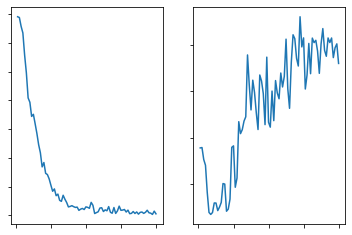

In [89]:
# def get_logs_(log_dir):
#     event_accumulator = EventAccumulator(log_dir)
#     event_accumulator.Reload()
#     try:
#         events = event_accumulator.Scalars("Train_Loss")
#     except:
#         events = event_accumulator.Scalars("Vit_Loss")

#     logs = {x.step : x.value for x in events}
  
#     return logs.keys(), logs.values()

# model_trained = ["cnn-80", "resnet50-80", "xception-80", "d8/vit-80", "mobilenetv2-80", "d8/vit-120", "d4/vit-80"]
# model_trained = ["cnn-80", "resnet50-80", "xception-80", "d8/vit-80", "mobilenetv2-80"]
# model_trained = ["d8/vit-ft-10"]
model_trained = ["d24/vit-d24-h8-25x150-80"]
event_accumulator = EventAccumulator(f'./runs/{model_trained[0]}')
event_accumulator.Reload()
# event_accumulator.Tags()
events1 = event_accumulator.Scalars("Train_Loss")
logs1 = {x.step : x.value for x in events1}
events2 = event_accumulator.Scalars("Eval_")
logs2 = {x.step : x.value for x in events2}
# print(events1, events2)
# print(len(events1))
# print(events1)
plt.subplot(1,2,1)
plt.plot(logs1.keys(), logs1.values())
plt.subplot(1,2,2)
plt.plot(logs2.keys(), logs2.values())
# plt.plot(range(len(events2)), events2)


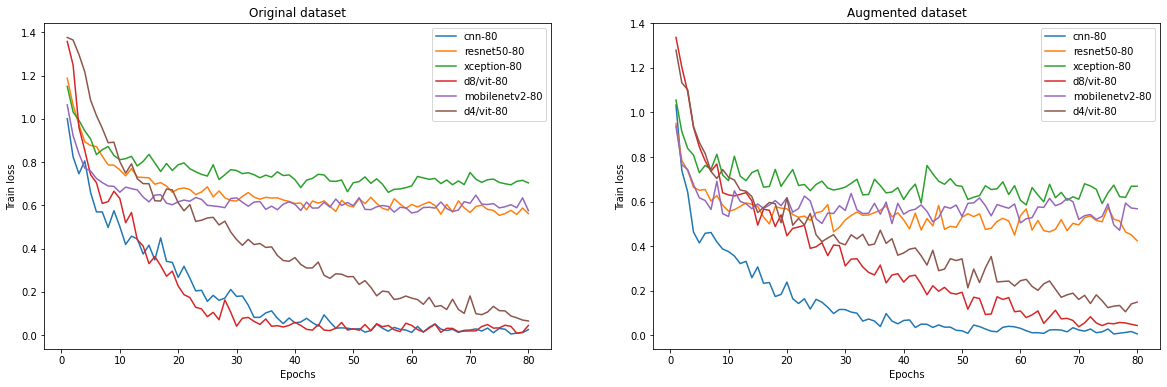

In [74]:
def get_logs(log_dir):
    event_accumulator = EventAccumulator(log_dir)
    event_accumulator.Reload()
    try:
        events = event_accumulator.Scalars("Train_Loss")
    except:
        events = event_accumulator.Scalars("Vit_Loss")

    logs = {x.step : x.value for x in events}
  
    return logs.keys(), logs.values()

# model_trained = ["cnn-80", "resnet50-80", "xception-80", "d8/vit-80", "mobilenetv2-80", "d8/vit-120", "d4/vit-80"]
model_trained = ["cnn-80", "resnet50-80", "xception-80", "d8/vit-80", "mobilenetv2-80", "d4/vit-80"]
# model_trained = ["cnn-80", "resnet50-80", "xception-80", "d8/vit-80", "mobilenetv2-80"]
# model_trained = ["d8/vit-80"]

log_dirs_ls = [f'./runs/{x}' for x in model_trained]

plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
for log_dir in log_dirs_ls:
    x,y = get_logs(log_dir)
    plt.plot(x,y)
plt.title("Original dataset")
plt.ylabel("Train loss")
plt.xlabel("Epochs")
plt.legend(model_trained)
# plt.show()


log_dirs_ls = [f'../scripts_aug/runs/{x}' for x in model_trained]
plt.subplot(1,2,2)

for log_dir in log_dirs_ls:
    x,y = get_logs(log_dir)
    plt.plot(x,y)

plt.title("Augmented dataset")
plt.ylabel("Train loss")
plt.xlabel("Epochs")
plt.legend(model_trained)
plt.show()

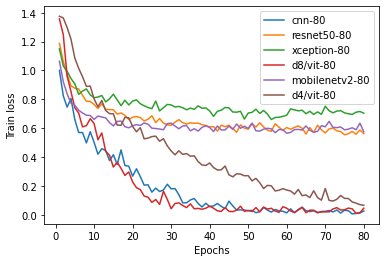

In [48]:
def get_logs(log_dir):
    event_accumulator = EventAccumulator(log_dir)
    event_accumulator.Reload()
    try:
        events = event_accumulator.Scalars("Train_Loss")
    except:
        events = event_accumulator.Scalars("Vit_Loss")

    logs = {x.step : x.value for x in events}
  
    return logs.keys(), logs.values()

# model_trained = ["cnn-80", "resnet50-80", "xception-80", "d8/vit-80", "mobilenetv2-80", "d8/vit-120", "d4/vit-80"]
model_trained = ["cnn-80", "resnet50-80", "xception-80", "d8/vit-80", "mobilenetv2-80", "d4/vit-80"]
# model_trained = ["cnn-80", "resnet50-80", "xception-80", "d8/vit-80", "mobilenetv2-80"]
# model_trained = ["d8/vit-80"]

log_dirs_ls = [f'./runs/{x}' for x in model_trained]

for log_dir in log_dirs_ls:
    x,y = get_logs(log_dir)
    plt.plot(x,y)
# plt.title("Training loss plot on weighted sampling dataset")
plt.ylabel("Train loss")
plt.xlabel("Epochs")
plt.legend(model_trained)
plt.show()

### Augmented dataset

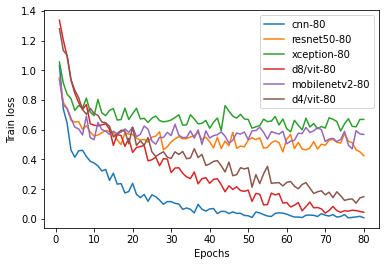

In [49]:
# model_trained = ["cnn-80", "resnet50-80", "xception-80", "d8/vit-80", "mobilenetv2-80", "d8/vit-120"]
# model_trained = ["d8/vit-sam-80"]

log_dirs_ls = [f'../scripts_aug/runs/{x}' for x in model_trained]

for log_dir in log_dirs_ls:
    x,y = get_logs(log_dir)
    plt.plot(x,y)

plt.ylabel("Train loss")
plt.xlabel("Epochs")
plt.legend(model_trained)
plt.show()

## Performance metrics

### Real dataset

In [77]:
results = pd.read_csv("./analysis/results.csv")

results = results[["model",'epoch', 'f1_score', 'precision', 'recall', 'accuracy', 'params']]
# results = results[['epoch', 'f1_score', 'accuracy', 'params']]
# results = results.drop([0,1,2,3,6])
print(results.to_latex(index=False))
# results

\begin{tabular}{lrrrrrr}
\toprule
               model &  epoch &  f1\_score &  precision &  recall &  accuracy &   params \\
\midrule
         resnet50-80 &     80 &  0.891918 &   0.891936 &   0.892 & 89.200005 & 23516228 \\
      mobilenetv2-80 &     80 &  0.901422 &   0.902917 &   0.902 & 90.200005 &  2228996 \\
              cnn-80 &     80 &  0.986964 &   0.987101 &   0.987 & 98.700005 &  3541000 \\
         xception-80 &     80 &  0.881668 &   0.881925 &   0.882 & 88.200005 & 20815148 \\
   vit-d8-25x150-120 &    120 &  0.973974 &   0.974740 &   0.974 & 97.400002 &  1306628 \\
   vit-d12-25x150-80 &     80 &  0.972929 &   0.973549 &   0.973 & 97.300003 &  1898500 \\
    vit-d4-25x150-80 &     80 &  0.966916 &   0.967642 &   0.967 & 96.700005 &   714756 \\
   vit-h32-25x150-80 &     80 &  0.975914 &   0.976415 &   0.976 & 97.600006 &  4452356 \\
vit-d24-h8-25x150-80 &     80 &  0.975962 &   0.976563 &   0.976 & 97.600006 &  3674116 \\
\bottomrule
\end{tabular}



/tmp/ipykernel_1768663/737693633.py:6: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(results.to_latex(index=False))


### Augmented dataset

In [72]:
results = pd.read_csv("../scripts_aug/analysis/results.csv")

results = results[["model",'epoch', 'f1_score', 'precision', 'recall', 'accuracy', 'params']]
results = results[["model",'epoch', 'f1_score', 'accuracy', 'params']]
# results = results.drop([0,1,3,4])
# results = results.drop([4])

# print(results.to_latex(index=False))
temp_ = ['resnet50-80', 'cnn-80', 'vit-d8', 'xception-80', 'mobilenetv2-80', 'vit-25x150-120', 'vit-25x150-80', 'vit-25x150-80', 'vit-25x150-80']
# results.model.values
results[results["model"] == temp_]
# print(results["model"] )
# results["model"] == temp_

,model,epoch,f1_score,accuracy,params
0,resnet50-80,80,0.891829,89.300003,23516228
1,cnn-80,80,0.995000,99.500008,3541000
3,xception-80,80,0.847364,84.900002,20815148
4,mobilenetv2-80,80,0.879502,88.200005,2228996
5,vit-25x150-120,120,0.966928,96.700005,1306628
6,vit-25x150-80,80,0.963998,96.400002,1898500
7,vit-25x150-80,80,0.963998,96.400002,1898500
8,vit-25x150-80,80,0.945944,94.600006,714756
